# Time Series Analysis

## 1. Import time series
Conjunto de valores ordenados en el tiempo

In [1]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [2]:
# Import as Dataframe de consumo de fármacos
df = pd.read_csv('data/a10.csv', parse_dates = ['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    204 non-null    datetime64[ns]
 1   value   204 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.3 KB


In [3]:
# Date in Index
df = pd.read_csv('data/a10.csv',
                 parse_dates = ['date'],
                 index_col='date')
df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


In [4]:
# Si no nos pilla bien la fecha
df['fecha_str'] = df.index.astype(str)

df[['year', 'month', 'day']] = df['fecha_str'].str.split('-', expand=True)
df['year'] = df['year'].astype(int)
df['month'] = df['month'].astype(int)
df['day'] = df['day'].astype(int)

df['new_date'] = pd.to_datetime(df[['year', 'month', 'day']])
df.head()

,value,fecha_str,year,month,day,new_date
date,,,,,,
1991-07-01,3.526591,1991-07-01,1991,7,1,1991-07-01
1991-08-01,3.180891,1991-08-01,1991,8,1,1991-08-01
1991-09-01,3.252221,1991-09-01,1991,9,1,1991-09-01
1991-10-01,3.611003,1991-10-01,1991,10,1,1991-10-01
1991-11-01,3.565869,1991-11-01,1991,11,1,1991-11-01


## 2. Panel data
Contiene una o más variables relacionadas, en el mismo periodo de tiempo.

In [5]:
df = pd.read_csv('data/MarketArrivals.csv')
df = df.loc[df.market=='MUMBAI', :]
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
6654,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI,January-2004
6655,MUMBAI,January,2005,275845,261,513,387,MS,MUMBAI,January-2005
6656,MUMBAI,January,2006,228000,315,488,402,MS,MUMBAI,January-2006
6657,MUMBAI,January,2007,205200,866,1136,997,MS,MUMBAI,January-2007
6658,MUMBAI,January,2008,267550,348,550,448,MS,MUMBAI,January-2008


## 3. Plot time series
Teniendo los datos en formato fecha y ordenados, es sencilla la representación. Un `plot` de matplotlib.pyplot sería suficiente.

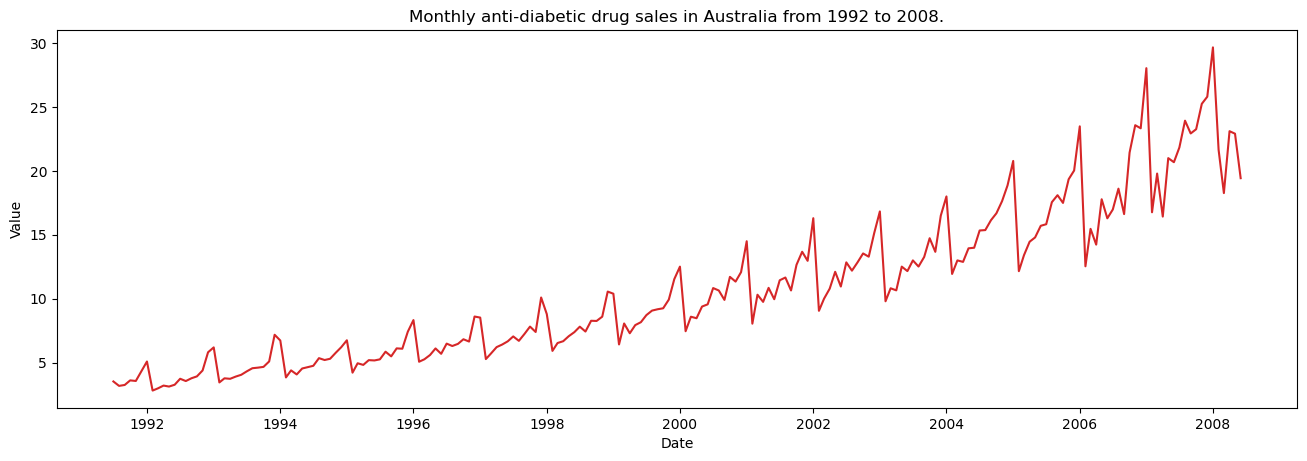

In [6]:
df = pd.read_csv('data/a10.csv', parse_dates=['date'], index_col='date')

# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df.value, title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.') 

Podemos enfatizar el crecimiento de los datos creando una gráfica simétrica

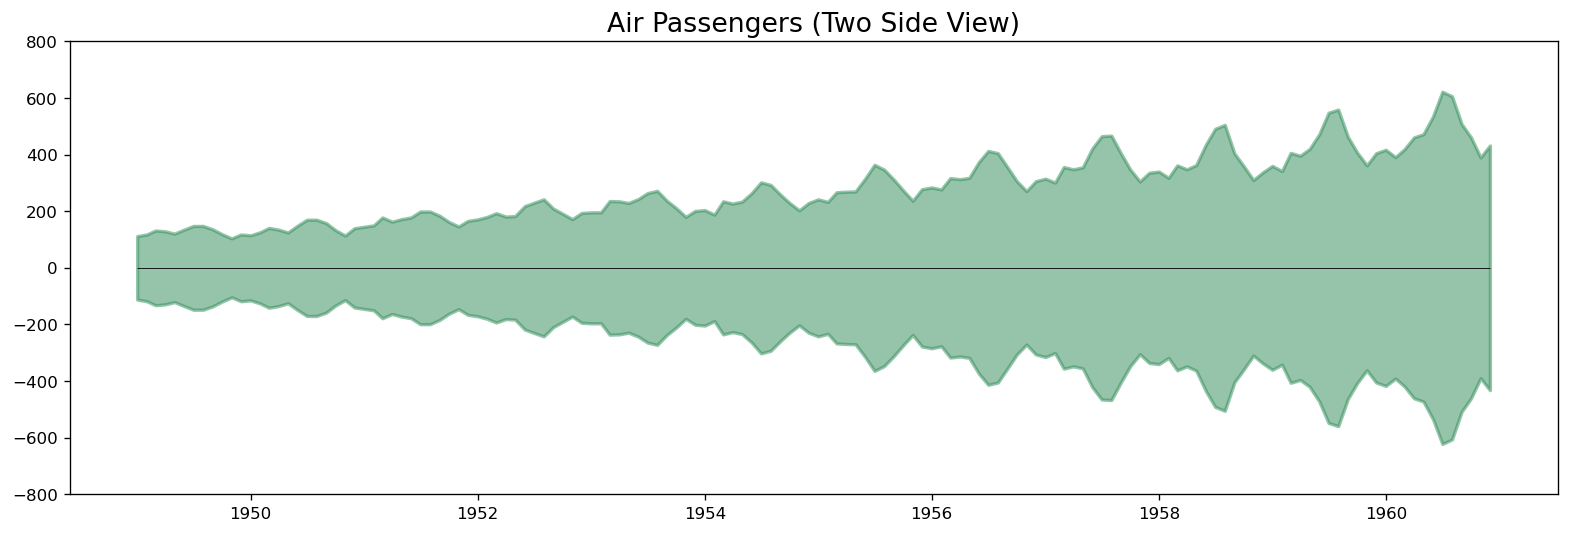

In [7]:
# Import data
df = pd.read_csv('data/AirPassengers.csv', parse_dates=['date'])
x = df['date'].values
y1 = df['value'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Air Passengers (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df.date), xmax=np.max(df.date), linewidth=.5)
plt.show()

Puesto que tenemos datos mensuales, con cierto patrón repetitivo, podremos visualizar una comparativa año a año.

Es posible observar que hay un gran consumo de fármacos en enero, y gran caida en febrero.

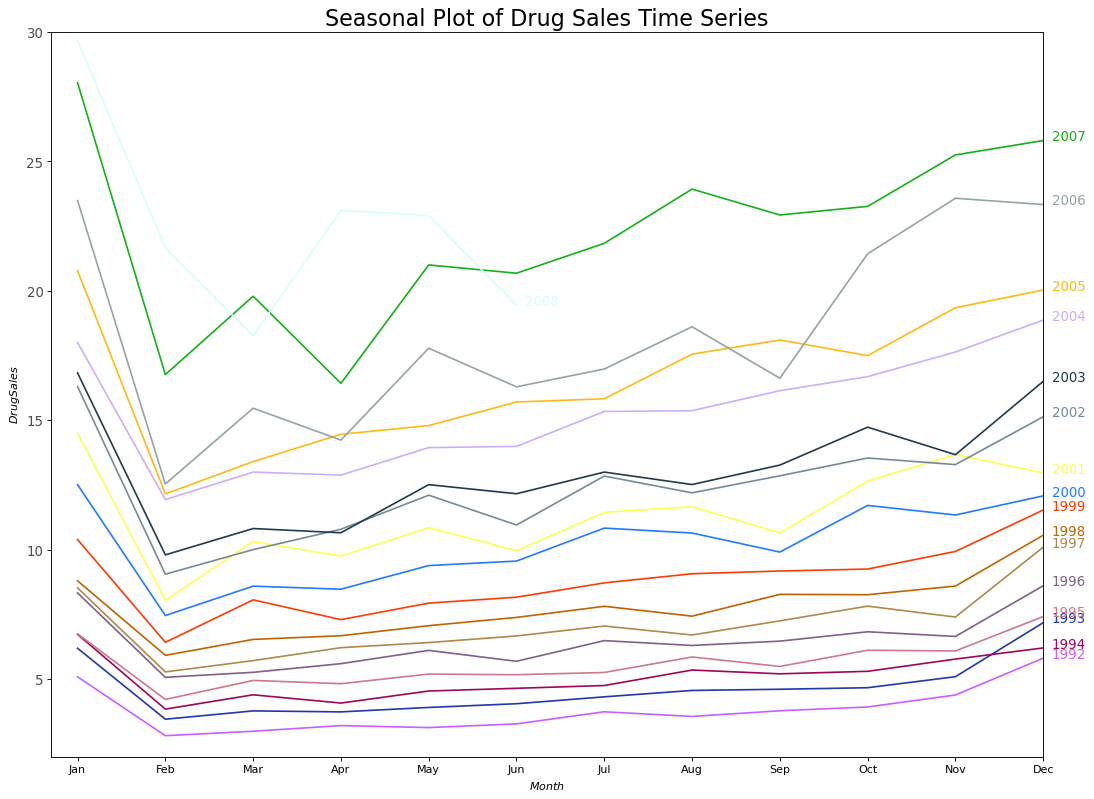

In [8]:
# Import Data
df = pd.read_csv('data/a10.csv', parse_dates=['date'], index_col='date')
df.reset_index(inplace=True)

# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'value', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'value'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Drug Sales$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
plt.show()

Vemos que cada año van incrementando las ventas, pero no se aprecia bien en la anterior gráfica. Podemos ver en un diagrama de caja cómo evolucionan las ventas anuales para destacar mejor ese progreso, y cómo varía cada año.

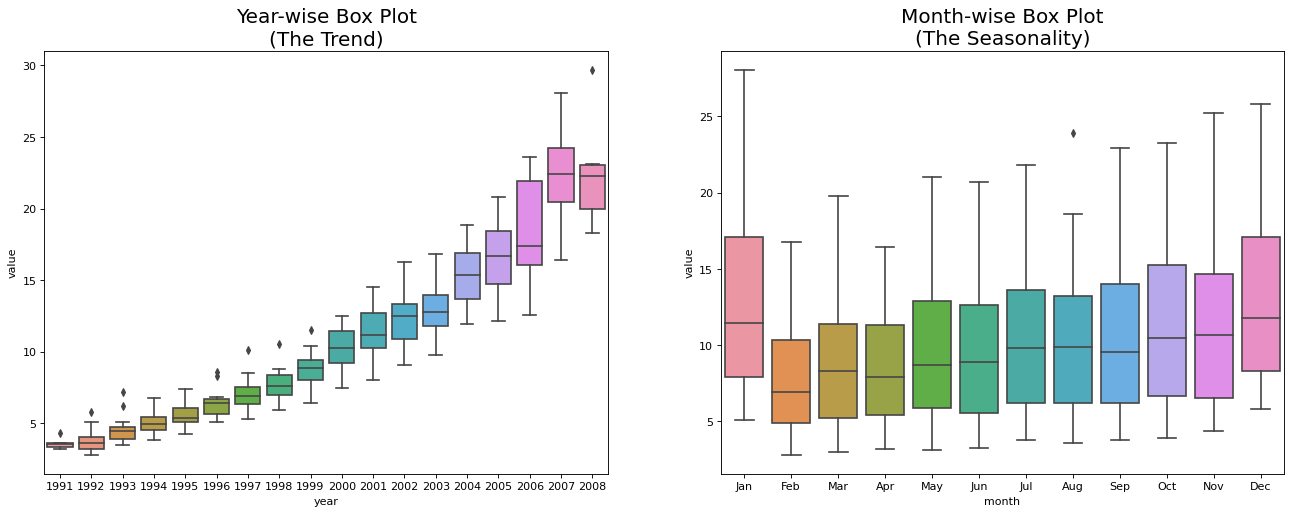

In [9]:
# Import Data
df = pd.read_csv('data/a10.csv', parse_dates=['date'], index_col='date')
df.reset_index(inplace=True)

# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='value', data=df, ax=axes[0])
sns.boxplot(x='month', y='value', data=df.loc[~df.year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

## 4. Decompose Time Series
Las series temporales se pueden descomponer en:

**Modelo aditivo**: Y(t) = T(t) + S(t) + c(t) + e(t)

**Modelo multiplicativo**: Y(t) = T(t) * S(t) * c(t) * e(t)

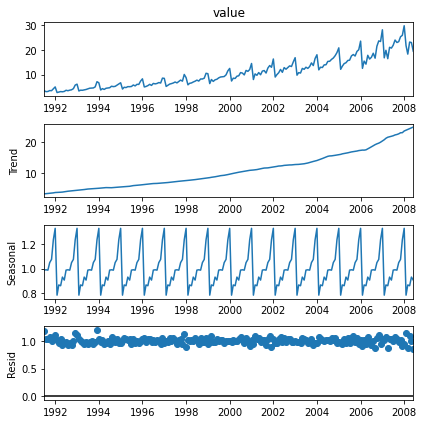

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Import Data
df = pd.read_csv('data/a10.csv', parse_dates=['date'], index_col='date')

# Multiplicative Decomposition 
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (6,6)})
result_mul.plot();

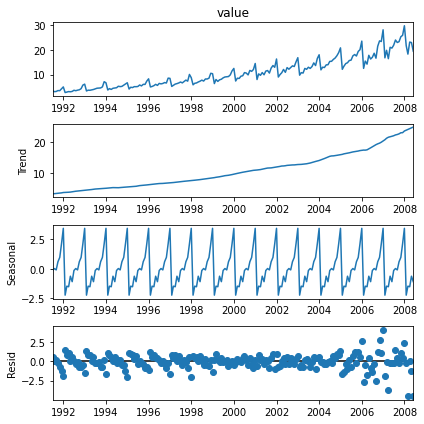

In [11]:
result_add.plot();

In [12]:
# Extract the Components ----
# Actual Values = Product of (Seasonal * Trend * Resid)
df_reconstructed = pd.concat([result_mul.seasonal,
                             result_mul.trend,
                             result_mul.resid,
                             result_mul.observed], axis=1)
df_reconstructed.head()

,seasonal,trend,resid,value
date,,,,
1991-07-01,0.987845,3.060085,1.166629,3.526591
1991-08-01,0.990481,3.124765,1.027745,3.180891
1991-09-01,0.987476,3.189445,1.032615,3.252221
1991-10-01,1.048329,3.254125,1.058513,3.611003
1991-11-01,1.074527,3.318805,0.999923,3.565869


## 5. Root Test Stationary
Utilizamos los root test para comprobar si la serie es stationary. La hipótesis nula de los test supone que la serie NO es estacionaria. Si el resultado del test queda por debajo del nivel de significación (0.05), rechazaremos la hipótesis nula en favor de la alternativa. La serie será estacionaria. En caso contrario la serie NO es estacionaria y por tanto habrá que aplicar técnicas de diferenciación.

In [13]:
from statsmodels.tsa.stattools import adfuller
df = pd.read_csv('data/a10.csv', parse_dates=['date'])

result = adfuller(df['value'].values, autolag = 'AIC')
result[1]

1.0

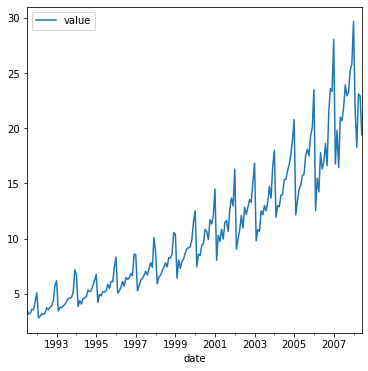

In [14]:
df = pd.read_csv('data/a10.csv', parse_dates=['date'], index_col='date')
df.plot()

## 6. Detrend a time series

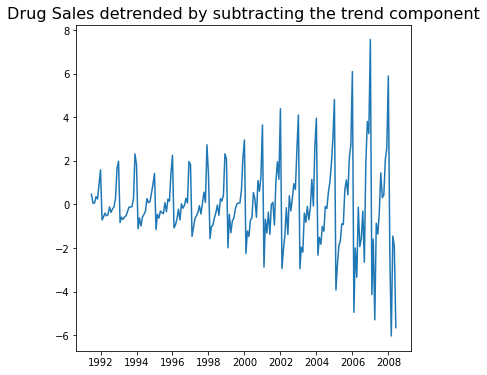

In [15]:
# Using statmodels: Subtracting the Trend Component.
from statsmodels.tsa.seasonal import seasonal_decompose
df = pd.read_csv('data/a10.csv',
                 parse_dates=['date'],
                 index_col='date')

result_add = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq')
detrended = df.value.values - result_add.trend
plt.plot(detrended)
plt.title('Drug Sales detrended by subtracting the trend component', fontsize=16);

In [16]:
result = adfuller(detrended.values, autolag = 'AIC')
result[1]

0.00028544613612296535

In [17]:
df['diff'] = df['value'].diff()
df.head()

,value,diff
date,,
1991-07-01,3.526591,NaN
1991-08-01,3.180891,-0.345700
1991-09-01,3.252221,0.071330
1991-10-01,3.611003,0.358782
1991-11-01,3.565869,-0.045134


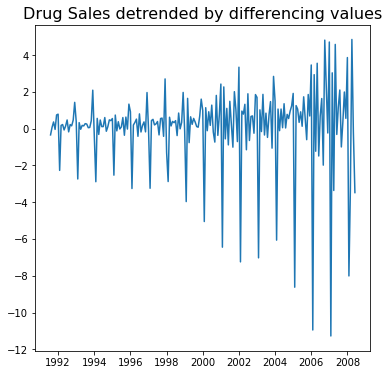

In [18]:
# Using statmodels
from statsmodels.tsa.seasonal import seasonal_decompose
df = pd.read_csv('data/a10.csv',
                 parse_dates=['date'],
                 index_col='date')

plt.plot(df['value'].diff())

plt.title('Drug Sales detrended by differencing values', fontsize=16);

In [19]:
result = adfuller(df['value'].diff().dropna().values, autolag = 'AIC')
result[1]

0.11665341686470221

## 7. Deseasonalize
También podemos eliminarle el componente estacional de la descomposición anterior.

Vemos en este ejemplo que el modelo aditivo no es el ideal ya que siguen apareciendo patrones estacionales en la serie.

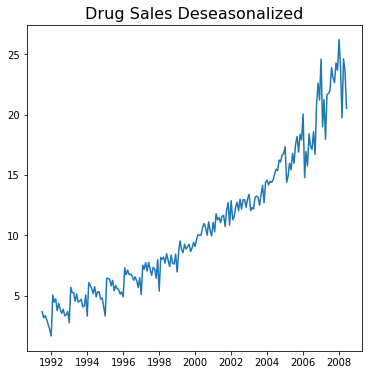

In [20]:
# Time Series Decomposition
result_add = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq')

# Deseasonalize
deseasonalized = df['value'].values - result_add.seasonal

# Plot
plt.plot(deseasonalized)
plt.title('Drug Sales Deseasonalized', fontsize=16);

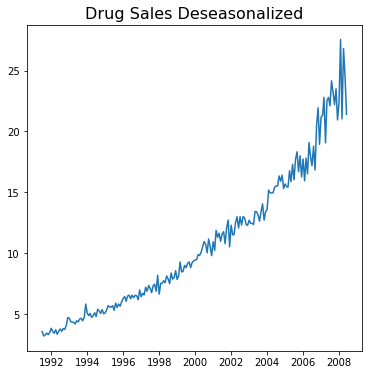

In [21]:
# Time Series Decomposition
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

# Deseasonalize
deseasonalized = df.value.values / result_mul.seasonal

# Plot
plt.plot(deseasonalized)
plt.title('Drug Sales Deseasonalized', fontsize=16);

## 7. Comprobación del seasonality en un Time Series
Lo mejor es mediante un plot, pero también puede resultar útil graficar la autocorrelación.

Vemos claramente los picos que hay cada 12 lags.

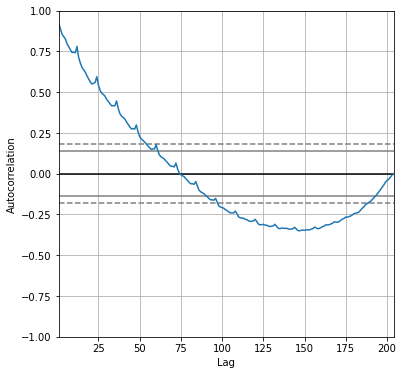

In [22]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df['value'].tolist());

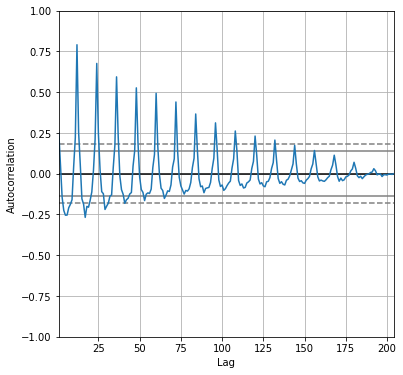

In [23]:
result_add = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq')
detrended = df.value.values - result_add.trend

autocorrelation_plot(detrended.tolist());

## 8. Missings

In [24]:
df = pd.read_csv('data/a10_missings.csv', parse_dates=['date'], index_col='date')
df

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,NaN
1991-10-01,3.611003
1991-11-01,NaN
...,...
1999-06-01,8.165323
1999-07-01,NaN
1999-08-01,9.070964


C:\Users\Alberto.Romero\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:73: RuntimeWarning: Mean of empty slice


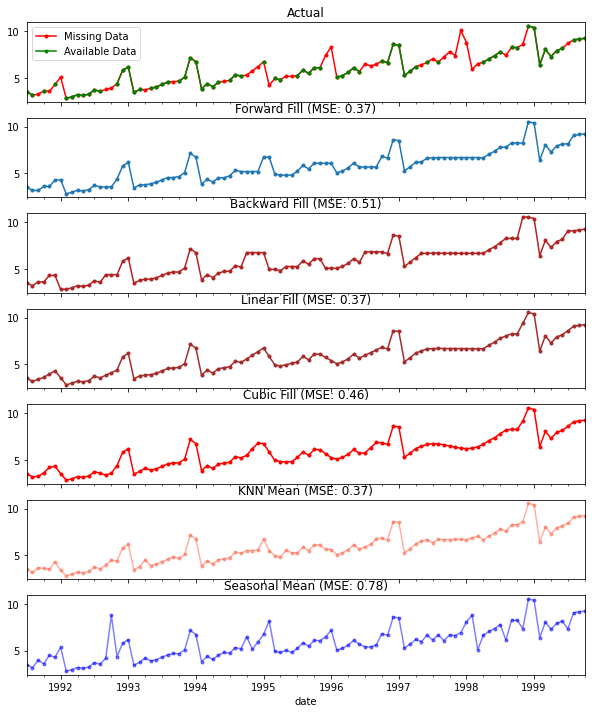

In [25]:
# # Generate dataset
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error
from scipy import interpolate
df_orig = pd.read_csv('data/a10.csv', parse_dates=['date'], index_col='date').head(100)
df = pd.read_csv('data/a10_missings.csv', parse_dates=['date'], index_col='date')

fig, axes = plt.subplots(7, 1, sharex=True, figsize=(10, 12))
plt.rcParams.update({'xtick.bottom' : False})

## 1. Actual -------------------------------
df_orig.plot(title='Actual', ax=axes[0], label='Actual', color='red', style=".-")
df.plot(title='Actual', ax=axes[0], label='Actual', color='green', style=".-")
axes[0].legend(["Missing Data", "Available Data"])


## 2. Forward Fill --------------------------
df_ffill = df.ffill()
error = np.round(mean_squared_error(df_orig['value'], df_ffill['value']), 2)
df_ffill['value'].plot(title='Forward Fill (MSE: ' + str(error) +")", ax=axes[1], label='Forward Fill', style=".-")


## 3. Backward Fill -------------------------
df_bfill = df.bfill()
error = np.round(mean_squared_error(df_orig['value'], df_bfill['value']), 2)
df_bfill['value'].plot(title="Backward Fill (MSE: " + str(error) +")", ax=axes[2], label='Back Fill', color='firebrick', style=".-")

## 4. Linear Interpolation ------------------
df['rownum'] = np.arange(df.shape[0])
df_nona = df.dropna(subset=['value'])
f = interp1d(df_nona['rownum'], df_nona['value'])
df['linear_fill'] = f(df['rownum'])
error = np.round(mean_squared_error(df_orig['value'], df['linear_fill']), 2)
df['linear_fill'].plot(title="Linear Fill (MSE: " + str(error) +")", ax=axes[3], label='Cubic Fill', color='brown', style=".-")

## 5. Cubic Interpolation --------------------
f2 = interp1d(df_nona['rownum'], df_nona['value'], kind='cubic')
df['cubic_fill'] = f2(df['rownum'])
error = np.round(mean_squared_error(df_orig['value'], df['cubic_fill']), 2)
df['cubic_fill'].plot(title="Cubic Fill (MSE: " + str(error) +")", ax=axes[4], label='Cubic Fill', color='red', style=".-")

# Interpolation References:
# https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html
# https://docs.scipy.org/doc/scipy/reference/interpolate.html

## 6. Mean of 'n' Nearest Past Neighbors ------
def knn_mean(ts, n):
    out = np.copy(ts)
    for i, val in enumerate(ts):
        if np.isnan(val):
            n_by_2 = np.ceil(n/2)
            lower = np.max([0, int(i-n_by_2)])
            upper = np.min([len(ts)+1, int(i+n_by_2)])
            ts_near = np.concatenate([ts[lower:i], ts[i:upper]])
            out[i] = np.nanmean(ts_near)
    return out

df['knn_mean'] = knn_mean(df.value.values, 8)
error = np.round(mean_squared_error(df_orig['value'], df['knn_mean']), 2)
df['knn_mean'].plot(title="KNN Mean (MSE: " + str(error) +")", ax=axes[5], label='KNN Mean', color='tomato', alpha=0.5, style=".-")

## 7. Seasonal Mean ----------------------------
def seasonal_mean(ts, n, lr=0.7):
    """
    Compute the mean of corresponding seasonal periods
    ts: 1D array-like of the time series
    n: Seasonal window length of the time series
    """
    out = np.copy(ts)
    for i, val in enumerate(ts):
        if np.isnan(val):
            ts_seas = ts[i-1::-n]  # previous seasons only
            if np.isnan(np.nanmean(ts_seas)):
                ts_seas = np.concatenate([ts[i-1::-n], ts[i::n]])  # previous and forward
            out[i] = np.nanmean(ts_seas) * lr
    return out

df['seasonal_mean'] = seasonal_mean(df.value, n=12, lr=1.25)
error = np.round(mean_squared_error(df_orig['value'], df['seasonal_mean']), 2)
df['seasonal_mean'].plot(title="Seasonal Mean (MSE: " + str(error) +")", ax=axes[6], label='Seasonal Mean', color='blue', alpha=0.5, style=".-");

## 9. Smoothing
Cómo suavizar la gráfica para ver mejor la tendencia.

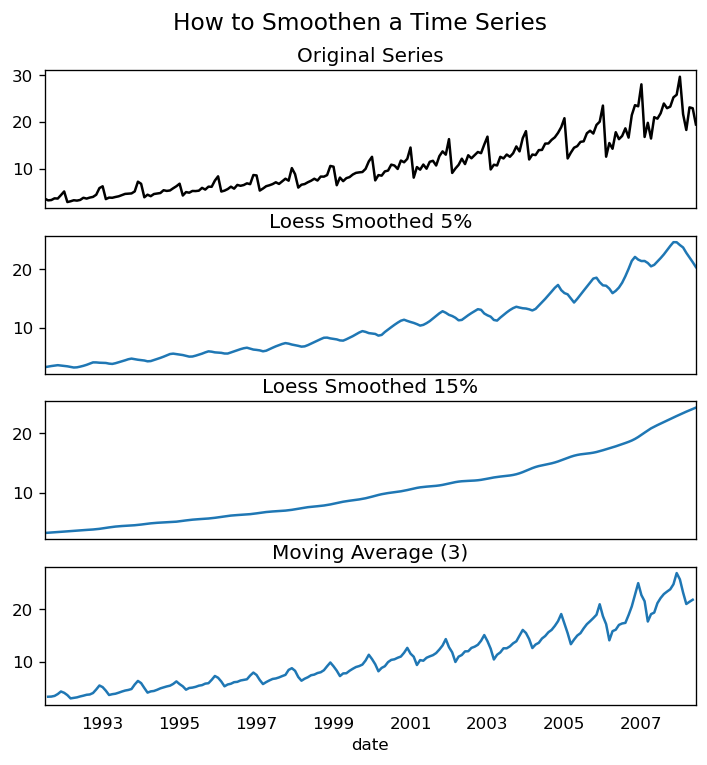

In [26]:
from statsmodels.nonparametric.smoothers_lowess import lowess
plt.rcParams.update({'xtick.bottom' : False, 'axes.titlepad':5})

# Import
df_orig = pd.read_csv('data/a10.csv', parse_dates=['date'], index_col='date')

# 1. Moving Average
df_ma = df_orig['value'].rolling(3, center=True, closed='both').mean()

# 2. Loess Smoothing (5% and 15%)
df_loess_5 = pd.DataFrame(lowess(df_orig.value, np.arange(len(df_orig.value)), frac=0.05)[:, 1], index=df_orig.index, columns=['value'])
df_loess_15 = pd.DataFrame(lowess(df_orig.value, np.arange(len(df_orig.value)), frac=0.15)[:, 1], index=df_orig.index, columns=['value'])

# Plot
fig, axes = plt.subplots(4,1, figsize=(7, 7), sharex=True, dpi=120)
df_orig['value'].plot(ax=axes[0], color='k', title='Original Series')
df_loess_5['value'].plot(ax=axes[1], title='Loess Smoothed 5%')
df_loess_15['value'].plot(ax=axes[2], title='Loess Smoothed 15%')
df_ma.plot(ax=axes[3], title='Moving Average (3)')
fig.suptitle('How to Smoothen a Time Series', y=0.95, fontsize=14)
plt.show()